In [ ]:
# !pip3 install praw

import praw
from praw.models import MoreComments
import pandas as pd
import numpy as np
# nltk - natural langauge processing
# wordcloud - for draw ing word cloud
# matplotlib - for charting
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice

In [ ]:
reddit = praw.Reddit(client_id='Uqa0qPvYrRATm6WB2yy6vw', client_secret='ExLLWnJZrEJ5XrSdU9GQ074YOoOg5A', user_agent='sentiment')

In [3]:
def get_whole_thread(submission):
    # d = {}
    comments = []
    for top_level_comment in submission.comments:
        # print("COMMENT:")
        # print(top_level_comment.body)
        # d[top_level_comment.body] = []
        comments.append(top_level_comment.body)
        replies = []
        replies.extend(top_level_comment.replies)
        while replies:
            reply = replies.pop(0)
            if isinstance(reply, MoreComments):
                continue
            # print("    SUBCOMMENT:")
            # print(reply.body)
            # d[top_level_comment.body].append(reply.body)
            comments.append(reply.body)
            # print("________")
            replies = list(reply.replies) + replies
    return comments

In [4]:
subreddit = reddit.subreddit("SGExams")
cnt = 0
posts = []
print("start")
for submission in subreddit.search("smu cs"):
    post = []
    post.append(submission.title)
    post.append(submission.selftext)
    comments = get_whole_thread(submission)
    post.append(comments)
    posts.append(post)

print('end')

start
end


In [24]:
df = pd.DataFrame(posts,columns=['title', 'body', 'comments'])
# print(df)
# df.to_csv("reddit_sg_exams.csv", sep='\t')
df.head()

,title,body,comments
0,[uni] SMU CS discovery day,got an acceptance email tdy for SMU CS saying ...,"[wat ur rp?, 82.5, I was equally as surprised ..."
1,[Uni] SMU cs or NUS cs,"\n\nHello, i’m looking to apply for my uni cou...","[Tbh and no offense to OP, I keep seeing these..."
2,[uni] SMU CS vs IS,"hi there, i just wanted to ask any students in...","[>hey ! current smu cs student, imo the resour..."
3,[UNI] How is SMU CS like?,Got rejected by NTU and NUS... I have attended...,[I would like to know too I’m thinking of join...
4,[A levels] NTU CS /NTU CE and SMU IS/SMU CS,So I got 75rp and can't go to NTU/SMU CS so I ...,[Go to NTU CE or SIT UOG if you really want to...


In [15]:
# qn_content = ''
# for line in df['title']:
#     if 'ntu' in line.lower() and 'cs' in line.lower():   
#         print(line)

In [33]:
only_ntu = df[df['title'].str.contains('NTU')]
only_ntu.head()

,title,body,comments
4,[A levels] NTU CS /NTU CE and SMU IS/SMU CS,So I got 75rp and can't go to NTU/SMU CS so I ...,[Go to NTU CE or SIT UOG if you really want to...
5,[Uni] SMU CS vs NTU CS,"Hey, anyone able to shed some light on SMU Com...",[Im unable to comment on SMU CS but I'm able t...
12,[Uni] NTU business and computing and SMU CS+BIZ,Hi all would need some advice on these choices...,"[[deleted], I havent seen anyone below 80, I h..."
14,[Uni] SMU CS or NTU CE,I just received admissions from these two Univ...,"[[deleted], Care to explain?]"
19,[UNI] NUS CS VS NTU CN YANG SCHOLARS PROGRAMME...,Hi! I would like to know whether I should cho...,[go cnyang if you want to do research. If unsu...


[A levels] NTU CS /NTU CE and SMU IS/SMU CS
[Uni] SMU CS vs NTU CS
[Uni] NTU business and computing and SMU CS+BIZ
[Uni] SMU CS or NTU CE
[UNI] NUS CS VS NTU CN YANG SCHOLARS PROGRAMME + CS
[A levels] SMU IS vs SIT CS vs NTU CE vs SUTD ISTD
[UNI] should I transfer from NTU CS to SMU IS
[Uni] why did you choose NTU/NUS CS?
[Uni] What are the job prospects of a biz degree? Should I study biz at NUS or CS at NTU/SMU?
[Uni] I need some help in choosing uni course. NTU or SMU for CS? seniors please give me your input!!


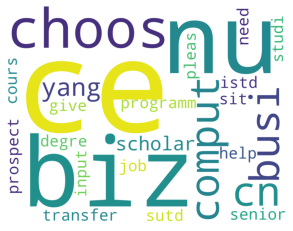

In [26]:
# NTU in the TITLE with SMU CS

stop_words = stopwords.words('english')
stop_words.extend(['ntu', 'uni', 'smu', 'cs', 'vs', 'level', 'levels'])

# for (columnName, columnData) in oe_qn.iteritems():
qn_content = ''
for line in df['title']:
#     for sentence in line:
    if 'ntu' in line.lower() and 'cs' in line.lower(): # Eliminates empty answers
        qn_content += line.lower() + ' '    
        print(line)
        #print(qn_content)

# Tokenize Words
tokenizer = RegexpTokenizer(r'\w+')
words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
#print(words_content)
#print(len(words_content))

# Remove stop words
words_filtered = []
for w in words_content:
    if w not in stop_words:
        words_filtered.append(w)

#print(words_filtered)
#print(len(words_filtered))

# Porter Stemmer
porter_stemmer = PorterStemmer()

words_stemmed = []
for w in words_filtered:
    words_stemmed.append(porter_stemmer.stem(w))

#print(words_stemmed)

# WordCloud
words_joined = " ".join([w for w in words_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                     width=1800,
                     height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
# plt.title('SMU thread related to NTU')
# plt.savefig(columnName, dpi=300)

So I got 75rp and can't go to NTU/SMU CS so I was thinking of NTU CE. I realised that NTU CE has pretty similar mods to NTU CS. I heard that its possible to transfer from NTU CE to NTU CS if one does relatively well in the first year? Same from SMU IS to SMU CS. Any idea how well one has to do gpa + portfolio wise in order to do so? Because if its too risky I'm thinking of SIT UOG instead. Thanks in advance!
--------------------------------------------------------------------------------
Hey, anyone able to shed some light on SMU Comp Sci vs NTU Comp Sci?  Right off the bat, NTU's Curriculum is 'heavier' as compared to SMU but does it really boil down to that?

&#x200B;

\- These are the two universities I have in mind as of now, currently in Year 3 Sem 2 with a GPA of 3.90.

\- Offered Early Admission for SMU CS. No news from NTU yet.
--------------------------------------------------------------------------------
Hi all would need some advice on these choices! 

My dad has been hinti

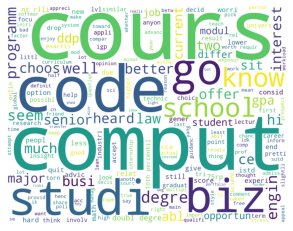

In [43]:
# NTU in the TITLE with SMU CS + check the BODY of these 
stop_words = stopwords.words('english')
stop_words.extend(['ntu', 'uni', 'nus','smu', 'sure', 'seem', 'cs', 'year', 'thank', 'thanks', 'vs', 'level','really', 'levels', 'joinchat', 
                   'got', 'lot', 'ask','feel', 'one', 'make', 'however', 'tat', 'want', 'think', 'i', 'am', "im", 'since'])

only_ntu = df[df['title'].str.contains('NTU')]
#only_ntu.head()

# for (columnName, columnData) in oe_qn.iteritems():
qn_content = ''
for line in only_ntu['body']:
#     for sentence in line:
    if 'joinchat' not in line.lower(): # Eliminates empty answers
        df['body']
        qn_content += line.lower() + ' '    
        print(line)
        print('--------------------------------------------------------------------------------')
        #print(qn_content)

# Tokenize Words
tokenizer = RegexpTokenizer(r'\w+')
words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
#print(words_content)
#print(len(words_content))

# Remove stop words
words_filtered = []
for w in words_content:
    if w not in stop_words:
        words_filtered.append(w)

#print(words_filtered)
#print(len(words_filtered))

# Porter Stemmer
porter_stemmer = PorterStemmer()

words_stemmed = []
for w in words_filtered:
    words_stemmed.append(porter_stemmer.stem(w))

#print(words_stemmed)

# WordCloud
words_joined = " ".join([w for w in words_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                     width=1800,
                     height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
# plt.title('SMU thread related to NTU')
# plt.savefig(columnName, dpi=300)

In [16]:
stop_words = stopwords.words('english')
stop_words.extend(['ntu', 'uni', 'smu', 'cs', 'vs', 'level', 'levels'])

# for (columnName, columnData) in oe_qn.iteritems():
qn_content = ''
for line in df['title']:
#     for sentence in line:
    if 'nus' in line.lower(): # Eliminates empty answers
        qn_content += line.lower() + ' '    
        print(line)

# Tokenize Words
tokenizer = RegexpTokenizer(r'\w+')
words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
#print(words_content)
#print(len(words_content))

# Remove stop words
words_filtered = []
for w in words_content:
    if w not in stop_words:
        words_filtered.append(w)

#print(words_filtered)
#print(len(words_filtered))

# Porter Stemmer
porter_stemmer = PorterStemmer()

words_stemmed = []
for w in words_filtered:
    words_stemmed.append(porter_stemmer.stem(w))

#print(words_stemmed)

# WordCloud
words_joined = " ".join([w for w in words_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                     width=1800,
                     height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
# plt.title('SMU thread related to NTU')
# plt.savefig(columnName, dpi=300)